In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
features=pd.read_csv('/content/gdrive/MyDrive/ids_project/train.csv') 
features.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
labels = pd.read_csv('/content/gdrive/MyDrive/ids_project/train_labels.csv')
labels.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


###Encoding labels

In [6]:
n_labels = {'functional': 0, 'non functional': 1,'functional needs repair': 2}
labels['status_group'] = labels['status_group'].map(n_labels)

In [7]:
features['labels'] = labels['status_group']

In [8]:
features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,labels
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,0.529596
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.628080
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,0.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,1.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2.000000


In [9]:
features.shape

(59400, 41)

###Outlier detection using KNN

In [10]:
features['amount_tsh'].max()

350000.0

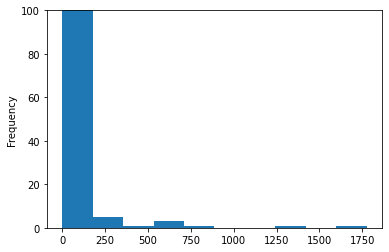

In [11]:
features['num_private'].plot.hist(ylim=(0,100))

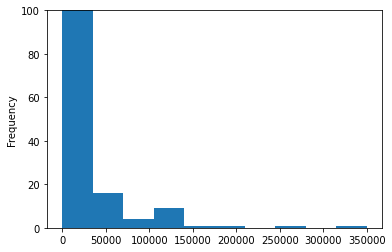

In [12]:
features['amount_tsh'].plot.hist(ylim=(0,100))

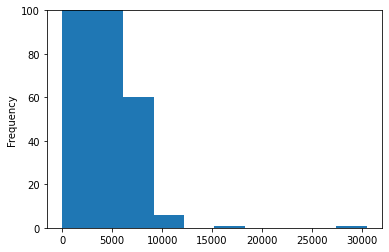

In [13]:
features['population'].plot.hist(ylim=(0,100))

In [14]:
numeric_features = features[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'labels']]

In [15]:
from pyod.models.knn import KNN
KNN_model = KNN()
KNN_model.fit(numeric_features)
outlier_labels = KNN_model.labels_
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)
outliers = numeric_features.iloc[outlier_labels == 1]

5940


In [16]:
outliers.shape

(5940, 10)

###Dropping Outliers

In [17]:
df = pd.merge(features, outliers, how='outer', indicator=True)
features = df.loc[df._merge == 'left_only']

In [18]:
features = features.drop('_merge', axis = 1)

In [19]:
features.shape

(53460, 41)

In [20]:
features.nunique()

id                       53460
amount_tsh                  54
date_recorded              354
funder                    1740
gps_height                2381
installer                 1951
longitude                51591
latitude                 51591
wpt_name                 34186
num_private                 36
basin                        9
subvillage               17935
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2064
population                 704
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2516
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [21]:
features.isnull().sum(axis = 0)

id                           0
amount_tsh                   0
date_recorded                0
funder                    3438
gps_height                   0
installer                 3455
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3146
recorded_by                  0
scheme_management         3422
scheme_name              25349
permit                    2825
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Drop scheme_name as it has too many null values and recorded_by because it only has one string value

In [22]:
features = features.drop('scheme_name', axis = 1) #too many null
features = features.drop('recorded_by', axis = 1) #one entity

extracting year of noting the data because it seem to be the useful information in this column (some major events like draughts could happen in some year)

In [23]:
datetime = pd.to_datetime(features['date_recorded'])
features['year'] = datetime.dt.year
features = features.drop('date_recorded', axis = 1)

In [24]:
features['public_meeting'].value_counts(dropna=False)

True     45643
False     4671
NaN       3146
Name: public_meeting, dtype: int64

In [25]:
features['permit'].value_counts(dropna=False)

True     34954
False    15681
NaN       2825
Name: permit, dtype: int64

Converting bool columns to int

In [26]:
features[['public_meeting', 'permit']] = features[['public_meeting','permit']].fillna(value=True)

In [27]:
features[['public_meeting', 'permit']] = features[['public_meeting', 'permit']].astype(int)

Dropping all Nan now because they are strings and thus unusable

In [28]:
features = features.dropna()

In [29]:
features.groupby('num_private')['id'].count()

num_private
0      45649
1         59
2         20
3         23
4         13
5         24
6         73
7         21
8         44
10         4
11        11
12         1
15        35
16         4
17        16
20         9
22         6
23         1
24         5
25        12
26         2
30         1
32        40
34         9
35         1
38         2
39        21
41         2
45        31
47        15
50         1
60         1
65        16
93        27
102        8
120        3
Name: id, dtype: int64

Dropping the column cause no explanation for data is present and it contains many 0 values

In [30]:
features = features.drop('num_private', axis = 1)

In [31]:
features.groupby('construction_year')['id'].count()

construction_year
0       16305
1960       43
1961       17
1962       26
1963       81
1964       38
1965       13
1966       10
1967       72
1968       71
1969       54
1970      278
1971      114
1972      624
1973      160
1974      581
1975      376
1976      321
1977      148
1978      886
1979      154
1980      514
1981      189
1982      617
1983      371
1984      561
1985      698
1986      305
1987      213
1988      413
1989      266
1990      522
1991      254
1992      550
1993      407
1994      555
1995      713
1996      518
1997      441
1998      750
1999      834
2000     1358
2001      437
2002      860
2003     1016
2004      943
2005      791
2006     1136
2007     1280
2008     2200
2009     2076
2010     2025
2011      999
2012      869
2013      157
Name: id, dtype: int64

filling the 0 year values with median year of construction

In [32]:
features['construction_year'] = features['construction_year'].replace(0, features['construction_year'].median())

In [33]:
features_unencoded = features.copy(deep=True)

###Encoding strings using label encoder 

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
text_features = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
for label in text_features:
    features[label] = le.fit_transform(features[label])

In [35]:
features = features.drop('id', axis = 1)

###Plotting correlation matrix to notice similarities in columns

In [36]:
import matplotlib.pyplot as plt

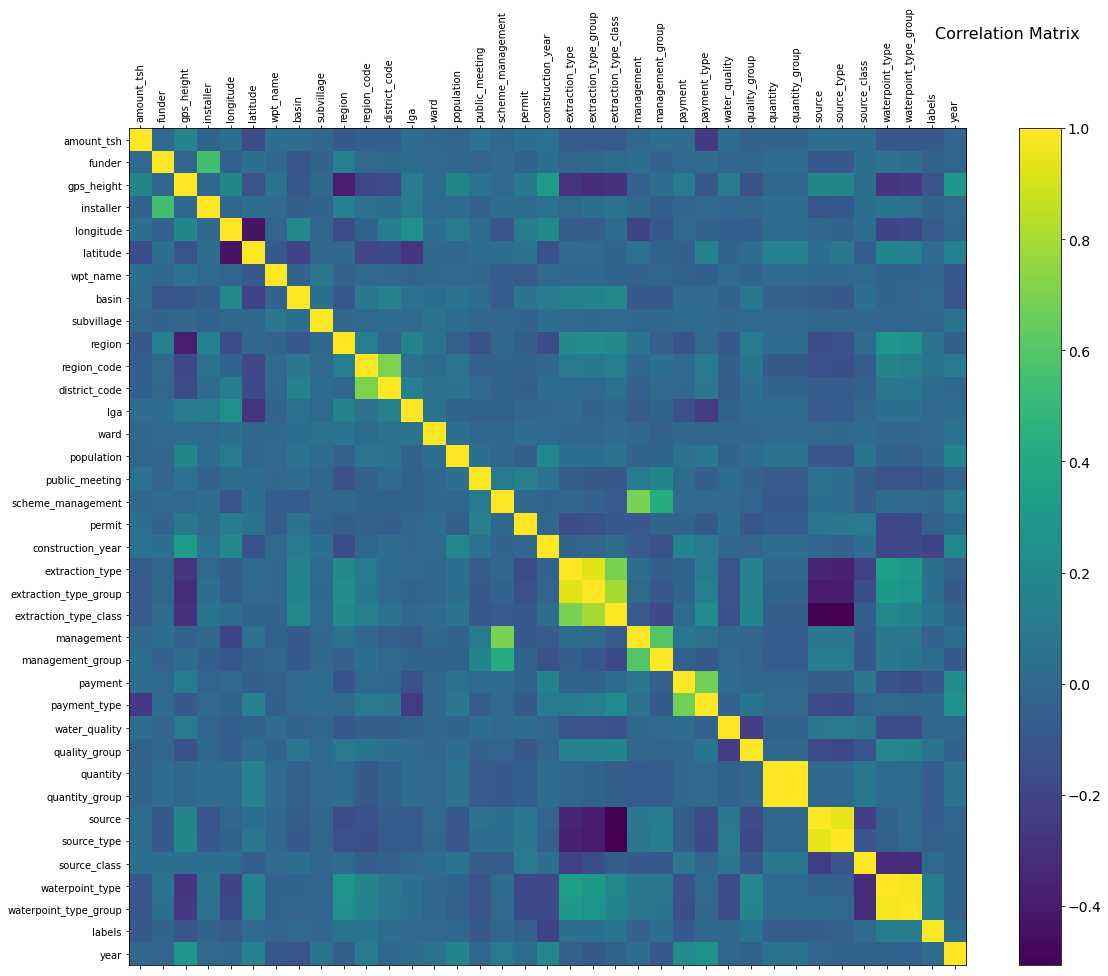

In [37]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features.corr(), fignum=f.number)
plt.xticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, x=1.05, y=1.1);

###Looking deeper for colors that seem similar

In [38]:
corr = features.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,labels,year
amount_tsh,1.00,0.01,0.18,-0.02,0.04,-0.15,0.04,0.03,-0.00,-0.08,-0.06,-0.06,0.03,0.00,-0.02,0.06,0.00,0.04,0.06,-0.07,-0.07,-0.08,0.00,0.04,0.03,-0.26,0.03,-0.04,-0.03,-0.03,0.04,0.03,0.04,-0.10,-0.10,-0.09,-0.01
funder,0.01,1.00,-0.01,0.54,-0.04,0.05,0.00,-0.10,-0.03,0.15,0.01,-0.01,0.03,0.01,-0.01,-0.01,0.02,-0.02,0.04,-0.02,-0.00,0.02,0.05,-0.03,0.01,0.02,-0.02,-0.01,0.03,0.03,-0.08,-0.08,0.05,0.07,0.05,-0.03,-0.02
gps_height,0.18,-0.01,1.00,-0.01,0.18,-0.12,0.06,-0.09,0.00,-0.38,-0.18,-0.16,0.11,0.03,0.18,0.06,0.01,0.10,0.33,-0.28,-0.31,-0.29,-0.03,0.03,0.12,-0.09,0.11,-0.13,-0.00,-0.00,0.18,0.18,0.05,-0.28,-0.26,-0.11,0.29
installer,-0.02,0.54,-0.01,1.00,0.00,0.04,0.01,-0.05,-0.03,0.15,0.05,0.03,0.12,0.01,0.02,-0.03,0.03,0.03,0.05,0.01,0.04,0.07,-0.01,-0.06,-0.02,0.01,-0.01,-0.01,0.03,0.03,-0.10,-0.09,0.05,0.07,0.05,-0.03,0.01
longitude,0.04,-0.04,0.18,0.00,1.00,-0.43,-0.01,0.20,0.00,-0.16,-0.02,0.13,0.25,0.04,0.11,0.02,-0.11,0.13,0.21,-0.07,-0.05,0.03,-0.20,-0.09,0.01,-0.02,-0.06,-0.06,0.02,0.02,0.00,-0.03,0.04,-0.19,-0.17,-0.08,0.00
latitude,-0.15,0.05,-0.12,0.04,-0.43,1.00,-0.08,-0.21,0.00,-0.01,-0.19,-0.17,-0.27,0.00,-0.01,0.03,0.04,0.07,-0.13,0.01,0.01,-0.02,0.06,-0.04,-0.06,0.16,-0.02,0.03,0.16,0.16,0.05,0.09,-0.05,0.17,0.15,0.02,0.16
wpt_name,0.04,0.00,0.06,0.01,-0.01,-0.08,1.00,-0.03,0.09,-0.03,0.01,-0.01,-0.03,-0.00,0.01,-0.01,-0.06,-0.08,0.01,-0.00,-0.00,-0.02,-0.04,-0.02,-0.05,-0.06,0.02,-0.02,0.02,0.02,-0.00,-0.00,0.01,-0.03,-0.03,-0.01,-0.09
basin,0.03,-0.10,-0.09,-0.05,0.20,-0.21,-0.03,1.00,0.05,-0.09,0.09,0.16,0.06,0.04,0.07,0.03,-0.07,0.07,0.12,0.15,0.17,0.19,-0.08,-0.08,0.01,0.01,-0.03,0.08,-0.05,-0.05,-0.06,-0.08,0.05,-0.03,-0.01,0.01,-0.11
subvillage,-0.00,-0.03,0.00,-0.03,0.00,0.00,0.09,0.05,1.00,0.00,0.01,0.03,0.01,0.06,0.03,-0.01,-0.01,-0.03,0.04,0.01,-0.00,0.01,0.00,-0.00,0.03,0.03,0.00,0.01,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.02,-0.01,0.07
region,-0.08,0.15,-0.38,0.15,-0.16,-0.01,-0.03,-0.09,0.00,1.00,0.14,-0.02,0.17,0.07,-0.04,-0.14,0.00,-0.06,-0.15,0.22,0.24,0.21,0.07,-0.05,-0.13,0.01,-0.09,0.11,0.02,0.02,-0.16,-0.14,0.02,0.28,0.25,0.07,-0.05


In [39]:
print(features_unencoded['payment'].unique())
print(features_unencoded['payment_type'].unique())

['never pay' 'pay per bucket' 'other' 'pay monthly'
 'pay when scheme fails' 'pay annually' 'unknown']
['never pay' 'per bucket' 'other' 'monthly' 'on failure' 'annually'
 'unknown']


In [40]:
print(features_unencoded['extraction_type_class'].unique())
print(features_unencoded['extraction_type_group'].unique())

['gravity' 'submersible' 'handpump' 'other' 'wind-powered' 'rope pump'
 'motorpump']
['gravity' 'submersible' 'swn 80' 'india mark ii' 'nira/tanira' 'other'
 'afridev' 'other handpump' 'india mark iii' 'wind-powered' 'rope pump'
 'mono' 'other motorpump']


In [41]:
print(features_unencoded['management'].unique())
print(features_unencoded['scheme_management'].unique())

['wug' 'vwc' 'private operator' 'water board' 'wua' 'parastatal'
 'water authority' 'unknown' 'company' 'other' 'other - school' 'trust']
['Other' 'VWC' 'Private operator' 'WUG' 'Water Board' 'WUA' 'Parastatal'
 'Water authority' 'Company' 'Trust' 'SWC' 'None']


As we can see there are many similar strings here and thus they are redundant 

In [42]:
drop_features = ['extraction_type_group', 'quantity_group', 'source_type', 'waterpoint_type_group', 'payment_type', 'extraction_type_class', 'extraction_type_group', 'management', 'scheme_management']

features = features.drop(drop_features, axis=1)

In [43]:
features.dtypes

amount_tsh           float64
funder                 int64
gps_height             int64
installer              int64
longitude            float64
latitude             float64
wpt_name               int64
basin                  int64
subvillage             int64
region                 int64
region_code            int64
district_code          int64
lga                    int64
ward                   int64
population             int64
public_meeting         int64
permit                 int64
construction_year      int64
extraction_type        int64
management_group       int64
payment                int64
water_quality          int64
quality_group          int64
quantity               int64
source                 int64
source_class           int64
waterpoint_type        int64
labels                 int64
year                   int64
dtype: object

###Train our first classifier to check where we're at

In [44]:
y_try = features['labels']
X_try = features.drop('labels', axis = 1)
from sklearn.model_selection import train_test_split
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try, y_try, test_size=0.30,random_state=314, shuffle=True, stratify=y_try)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgboost = XGBClassifier()
xgboost.fit(X_train_try, y_train_try)
y_pred = xgboost.predict(X_test_try)
f1 = f1_score(y_pred, y_test_try, average='weighted')
print('F1 score: {}'.format(f1))

F1 score: 0.7702103421061973


###Seaborn plot to clearly see if some features have strong correlation and thus can be combined (if seem sensical)

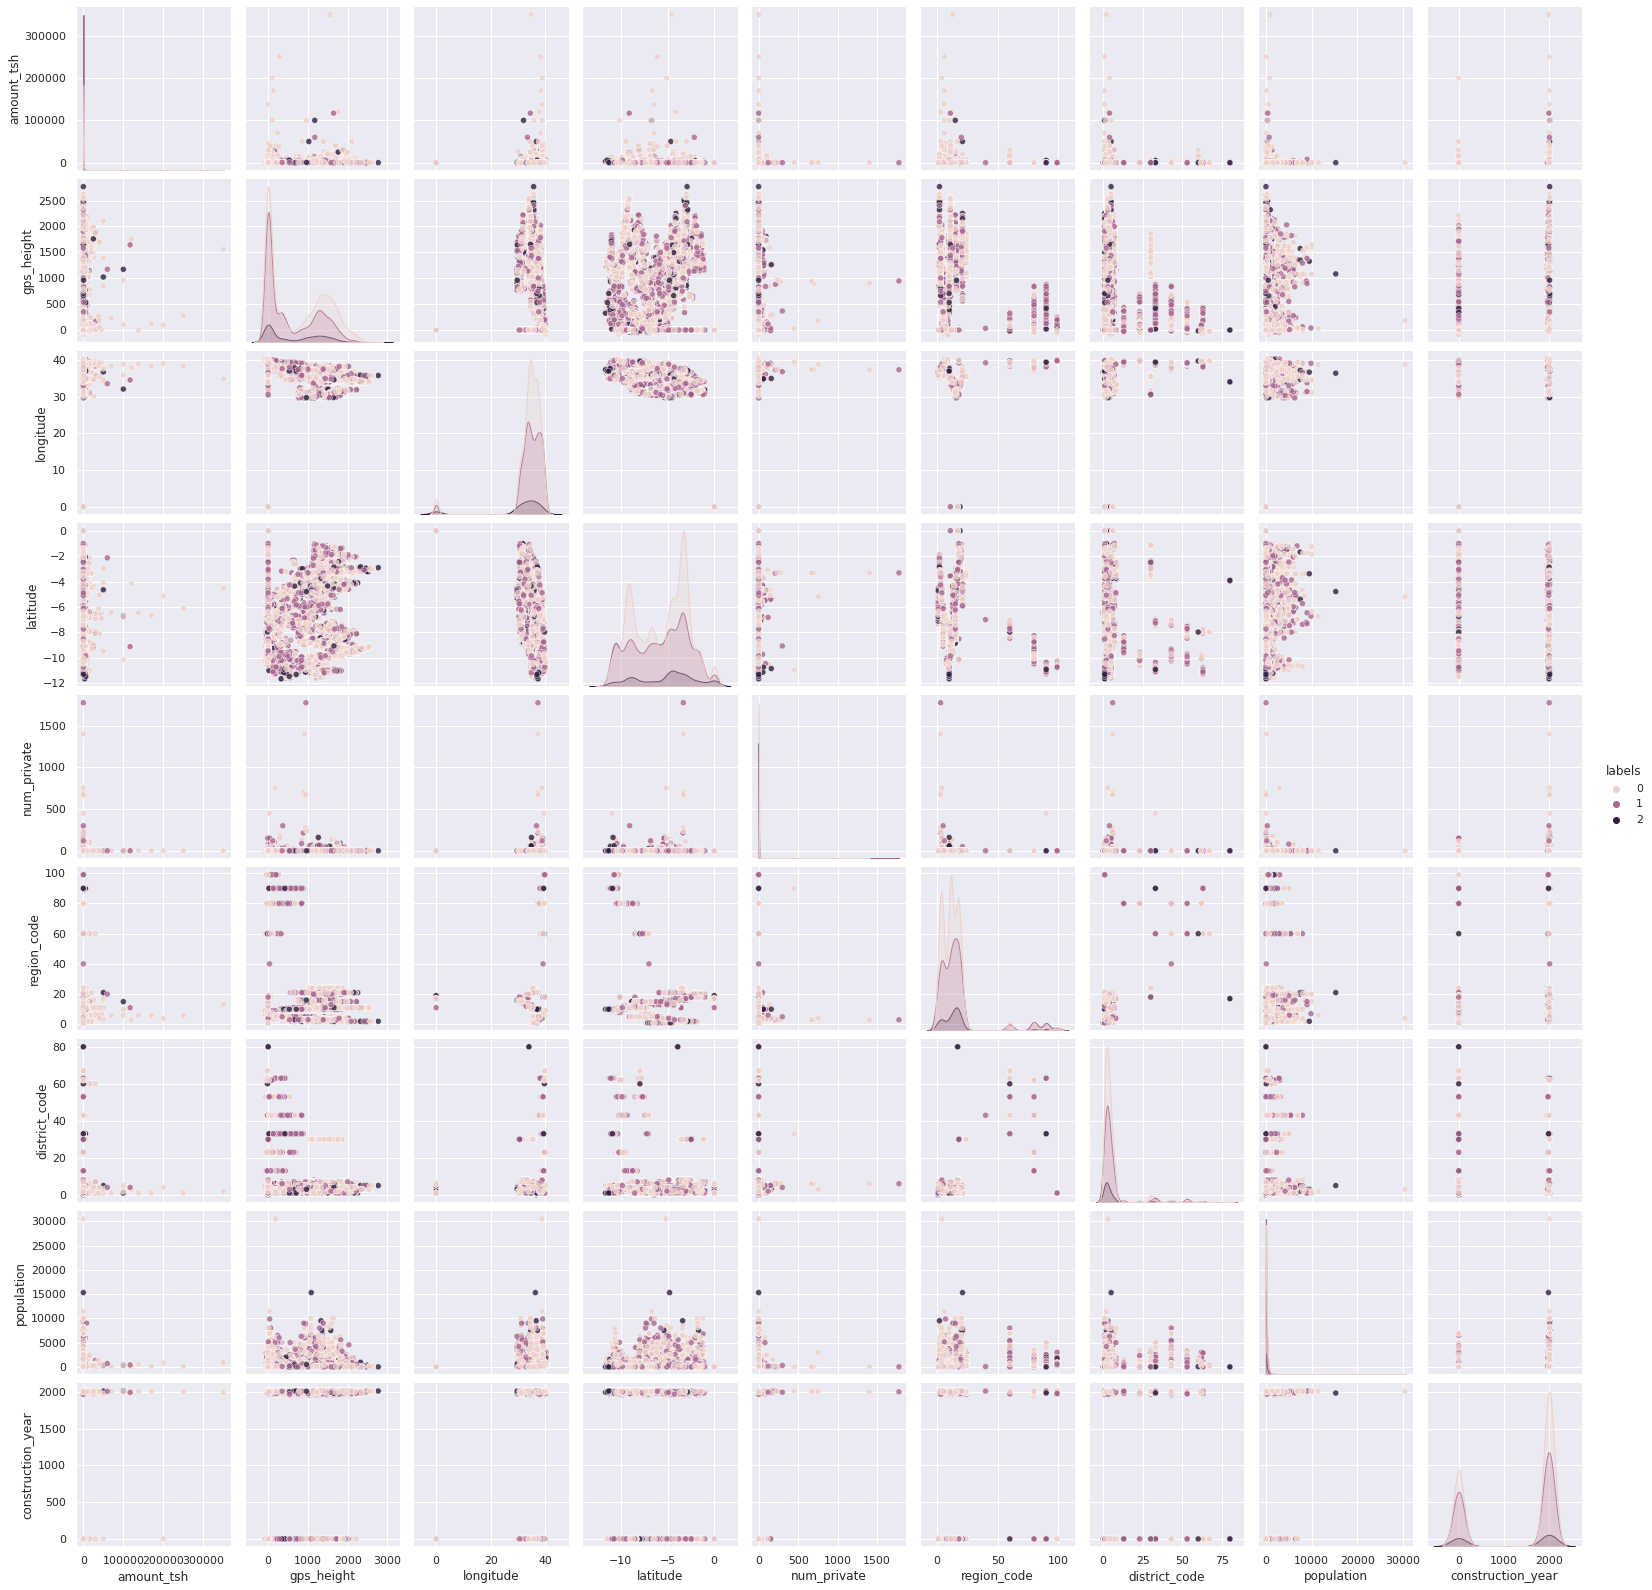

In [46]:
import seaborn as sns
sns.set()
sns.pairplot(numeric_features, hue='labels', kind = 'scatter', plot_kws=dict(alpha=0.8))
plt.show()

###Plotting individual features to look for clear patterns of absurdities in our data

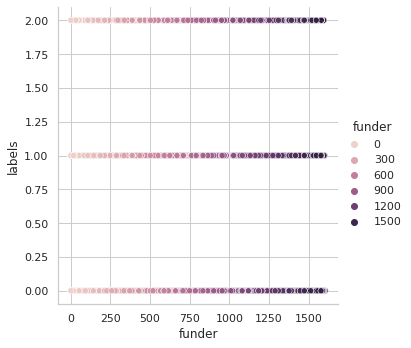

In [47]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="funder", y="labels", hue="funder")
ax.set(ylabel="labels")

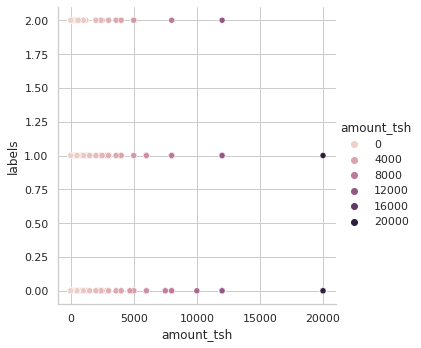

In [48]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="amount_tsh", y="labels", hue="amount_tsh")
ax.set(ylabel="labels")

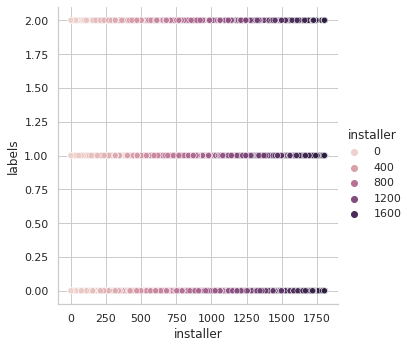

In [49]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="installer", y="labels", hue="installer")
ax.set(ylabel="labels")

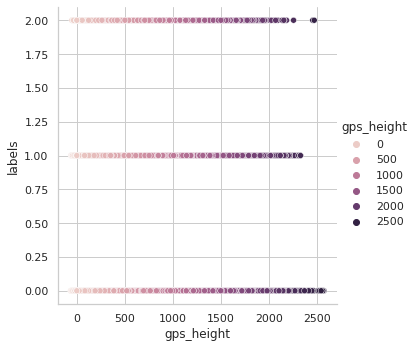

In [50]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="gps_height", y="labels", hue="gps_height")
ax.set(ylabel="labels")

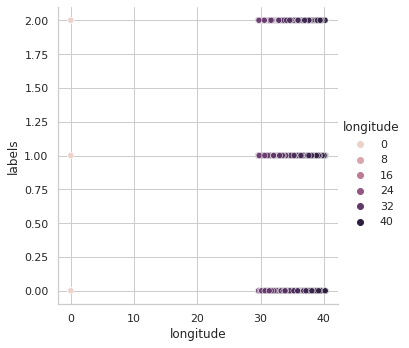

In [51]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="longitude", y="labels", hue="longitude")
ax.set(ylabel="labels")

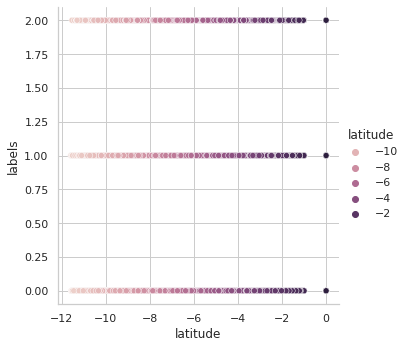

In [52]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="latitude", y="labels", hue="latitude")
ax.set(ylabel="labels")

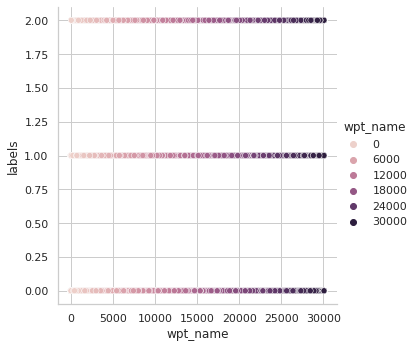

In [53]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="wpt_name", y="labels", hue="wpt_name")
ax.set(ylabel="labels")

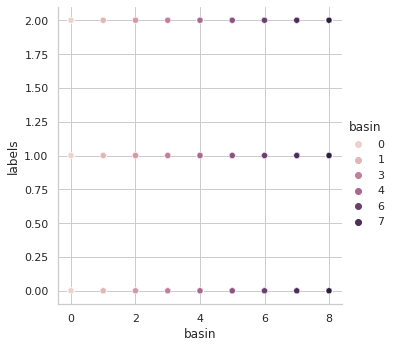

In [54]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="basin", y="labels", hue="basin")
ax.set(ylabel="labels")

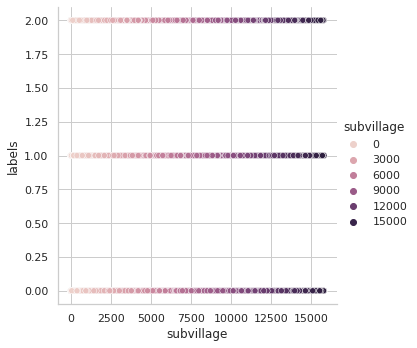

In [55]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="subvillage", y="labels", hue="subvillage")
ax.set(ylabel="labels")

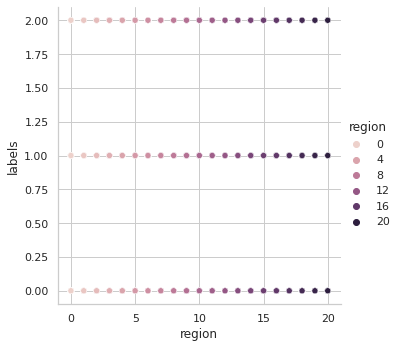

In [56]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="region", y="labels", hue="region")
ax.set(ylabel="labels")

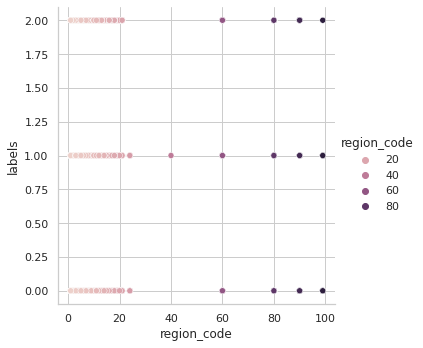

In [57]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="region_code", y="labels", hue="region_code")
ax.set(ylabel="labels")

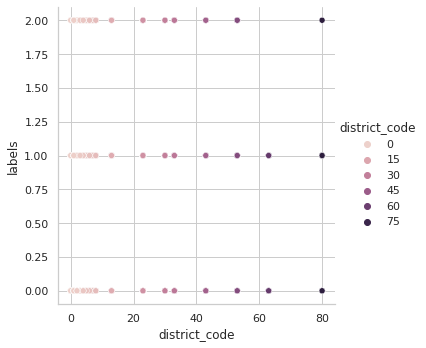

In [58]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="district_code", y="labels", hue="district_code")
ax.set(ylabel="labels")

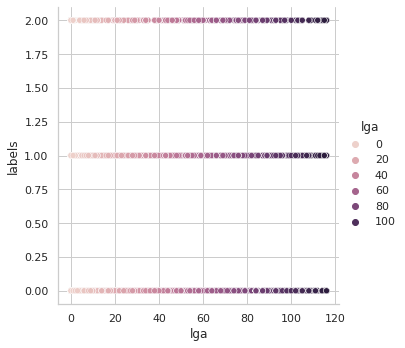

In [59]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="lga", y="labels", hue="lga")
ax.set(ylabel="labels")

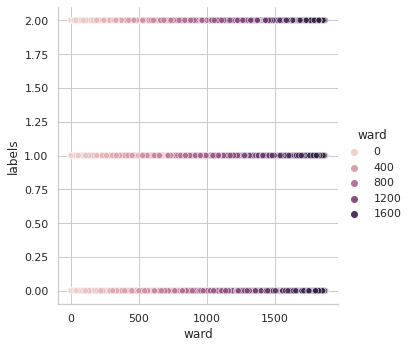

In [60]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="ward", y="labels", hue="ward")
ax.set(ylabel="labels")

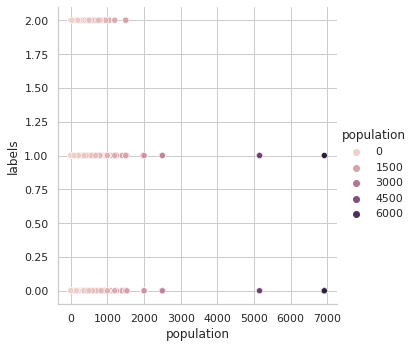

In [61]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="population", y="labels", hue="population")
ax.set(ylabel="labels")

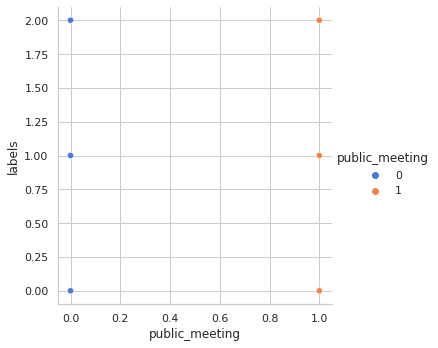

In [62]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="public_meeting", y="labels", hue="public_meeting")
ax.set(ylabel="labels")

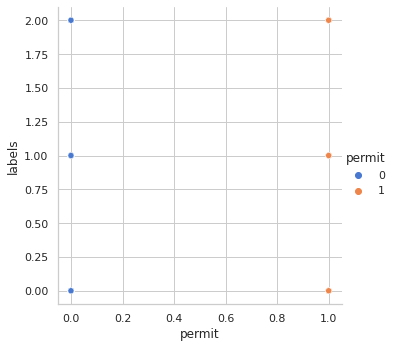

In [63]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="permit", y="labels", hue="permit")
ax.set(ylabel="labels")

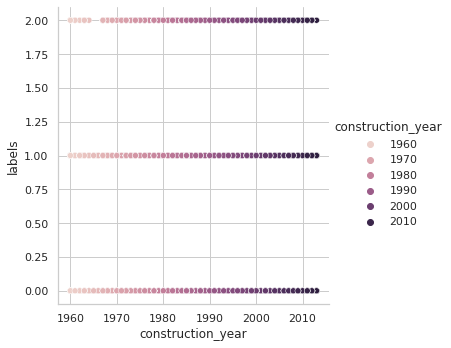

In [64]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="construction_year", y="labels", hue="construction_year")
ax.set(ylabel="labels")

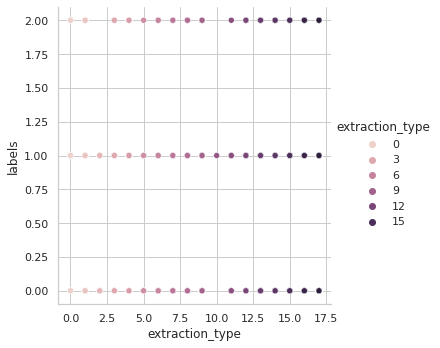

In [65]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="extraction_type", y="labels", hue="extraction_type")
ax.set(ylabel="labels")

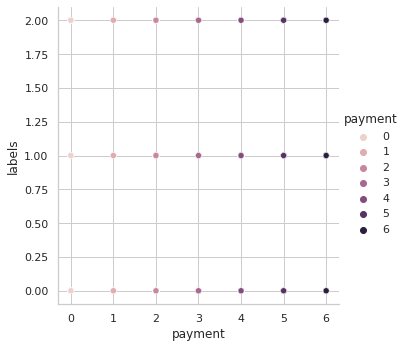

In [66]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="payment", y="labels", hue="payment")
ax.set(ylabel="labels")

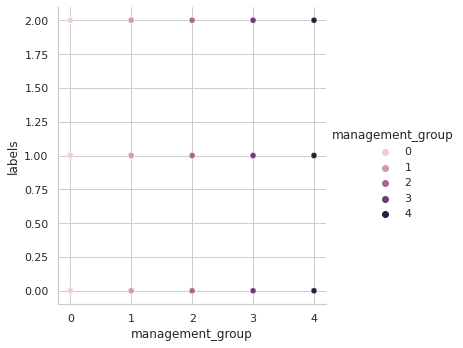

In [67]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="management_group", y="labels", hue="management_group")
ax.set(ylabel="labels")

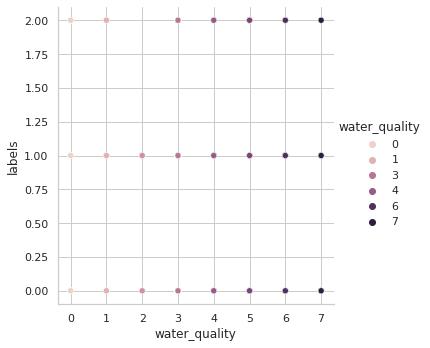

In [68]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="water_quality", y="labels", hue="water_quality")
ax.set(ylabel="labels")

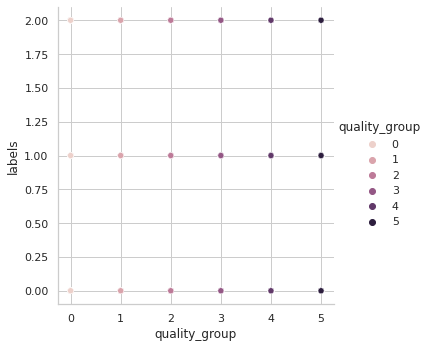

In [69]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="quality_group", y="labels", hue="quality_group")
ax.set(ylabel="labels")

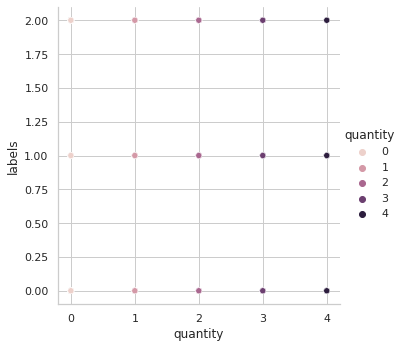

In [70]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="quantity", y="labels", hue="quantity")
ax.set(ylabel="labels")

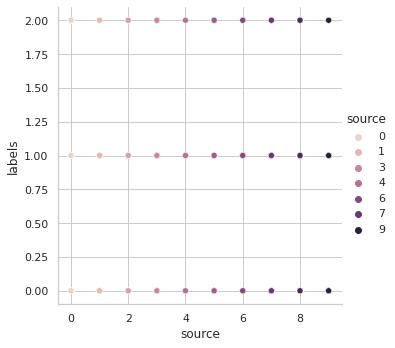

In [71]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="source", y="labels", hue="source")
ax.set(ylabel="labels")

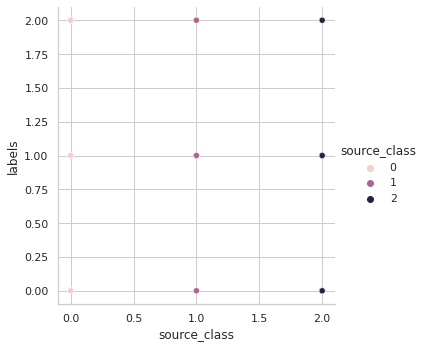

In [72]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="source_class", y="labels", hue="source_class")
ax.set(ylabel="labels")

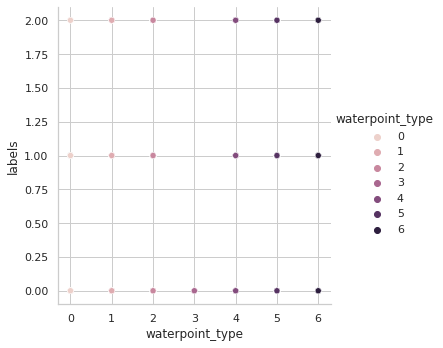

In [73]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="waterpoint_type", y="labels", hue="waterpoint_type")
ax.set(ylabel="labels")

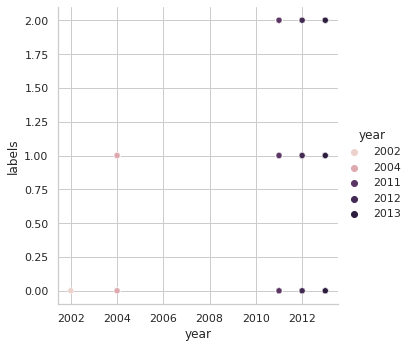

In [74]:
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.relplot(data=features, x="year", y="labels", hue="year")
ax.set(ylabel="labels")

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

###Train function to fit data and return metrics

In [76]:
def train(clf_dict, X, y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=314, shuffle=True, stratify=y)

  scaler = MinMaxScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)


  clf = next(iter(clf_dict))
  params_grid = next(iter(clf_dict.items()))[1]

  if clf == "KNeighborsClassifier":
    clf = KNeighborsClassifier()
  
  elif clf == "RandomForestClassifier":
    clf = RandomForestClassifier()

  elif clf == "LogisticRegression":
    clf = LogisticRegression(penalty='l2', max_iter=5000)

  else:
    clf = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  f1 = round(f1_score(y_test, y_pred, average='weighted',), 2)
  b_score = balanced_accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  return clf, y_pred, f1, b_score, cm 

###Function for grid search and returning the parameters

In [77]:
def grid_search(clf_dict, X, y):

  clf = next(iter(clf_dict))
  params_grid = next(iter(clf_dict.items()))[1]

  if clf == "KNeighborsClassifier":
    clf = KNeighborsClassifier()
  
  elif clf == "RandomForestClassifier":
    clf = RandomForestClassifier()

  elif clf == "LogisticRegression":
    clf = LogisticRegression(penalty='l2', max_iter=5000)

  else:
    clf = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=314, shuffle=True, stratify=y)

  cv = KFold(n_splits=5, shuffle=True, random_state=5)

  gs =  GridSearchCV(clf, param_grid=params_grid, cv=cv, scoring='balanced_accuracy')

  gs.fit(X_train, y_train)

  return gs.best_params_

In [81]:
clfs_dict = {'KNeighborsClassifier': {'n_neighbors': range(3, 17, 2)},
        'RandomForestClassifier': {'n_estimators':range(1, 15, 1), 'max_features':range(1, 16, 1)},
        'LogisticRegression': {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'max_iter': [2000]},
        'XGBClassifier': {'max_depth': range(1, 10, 1), 'alpha': range(1, 10, 1), 'n_estimators': range(1, 20, 1)}}

#Training classifiers ans printing metrics

In [82]:
for key, value in clfs_dict.items():
  parse_dict = {key: value}
  _, _, f1, b_score, _= train(parse_dict, X_try, y_try)
  print("F1 score for {} = {}, Balanced_Accuracy = {}".format(key, f1, b_score))

F1 score for KNeighborsClassifier = 0.73, Balanced_Accuracy = 0.5882120531805773
F1 score for RandomForestClassifier = 0.81, Balanced_Accuracy = 0.6705571258824422
F1 score for LogisticRegression = 0.62, Balanced_Accuracy = 0.4503391140086539
F1 score for XGBClassifier = 0.72, Balanced_Accuracy = 0.5261454467725323


##Running Grid Search for our classifiers and passing them for training

In [83]:
optimal_p = []
for key, value in clfs_dict.items():
  parse_dict1 = {key: value}
  optim_params = grid_search(parse_dict1, X_try, y_try)
  parse_dict2 = {key: optim_params}
  optimal_p.append(parse_dict2)
  _, _, f1, b_score, _ = train(parse_dict2, X_try, y_try)
  print("F1 score for {} = {}, Balanced_Accuracy = {}".format(key, f1, b_score))

F1 score for KNeighborsClassifier = 0.73, Balanced_Accuracy = 0.5882120531805773
F1 score for RandomForestClassifier = 0.81, Balanced_Accuracy = 0.6666483158516657
F1 score for LogisticRegression = 0.62, Balanced_Accuracy = 0.4503391140086539


KeyboardInterrupt: ignored

In [84]:
#XGBoost classifier grid search ran for 1.5 hrs and yet didnt output for shortage of time we stopped this loop

The scores improved a little but not substantially

---



###Merging latitude and longitude using geohash and then encoding to mark location indicators in one column

In [85]:
import pygeohash as gh

geo_df = features[['latitude', 'longitude']]

geo_df['geohash']=features.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=5), axis=1)

geo_df['geohash'] = le.fit_transform(geo_df['geohash'])

features['geo_hash'] = geo_df['geohash']

In [86]:
features = features.drop(['longitude', 'latitude'], axis = 1)

###Defining another custom column for per capita amount of water
 

In [87]:
features = features[features['population'] != 0]
features['per_capita_amount'] = features['amount_tsh'] / features['population']
features = features.drop(['amount_tsh', 'population'], axis=1)

In [88]:
y_new = features['labels']
X_new = features.drop('labels', axis = 1)

###Trying our models with new custom features

In [89]:
clfs = []
confusion_matrices = []
for key, value in clfs_dict.items():
  parse_dict = {key: value}
  clf, _, f1, b_score, cm = train(parse_dict, X_new, y_new)
  clfs.append(clf)
  confusion_matrices.append(cm)
  print("F1 score for {} = {}, Balanced_Accuracy = {}".format(key, f1, b_score))

F1 score for KNeighborsClassifier = 0.74, Balanced_Accuracy = 0.5728136145525307
F1 score for RandomForestClassifier = 0.8, Balanced_Accuracy = 0.6380502631160622
F1 score for LogisticRegression = 0.65, Balanced_Accuracy = 0.46601643430331224
F1 score for XGBClassifier = 0.73, Balanced_Accuracy = 0.544173905141555


F1 score nearly improves dor all 4 classifiers while balanced accuracy only improves for Logistic Regression and XGBoost

###Plotting feature importances for the best classifier: RandomForest

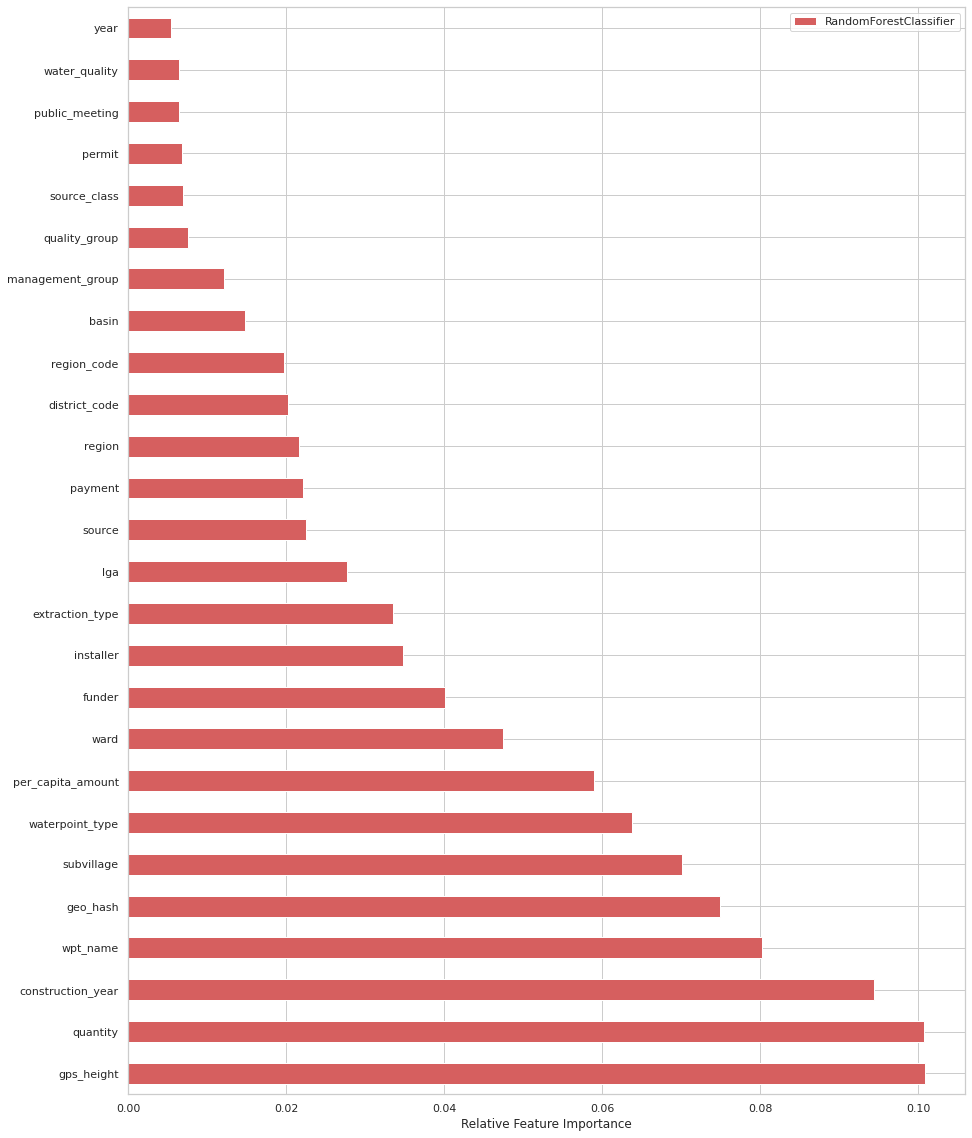

In [90]:
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(111)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33,random_state=314, shuffle=True, stratify=y_new)

feature_importances = pd.Series(clfs[1].feature_importances_, index=X_train.columns)
feature_importances.nlargest(X_train.shape[1]).plot(kind = 'barh', color = 'r', label = 'RandomForestClassifier')
plt.xlabel('Relative Feature Importance')
plt.legend()

Our new variable as is evident from feature importance contribute majorly to the classifier and thus seem to be good


###Confusion matrix plots of classifiers


Knn

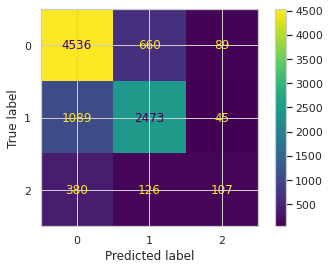

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[0], display_labels=clfs[0].classes_)
disp.plot()
plt.show()

Random Forest

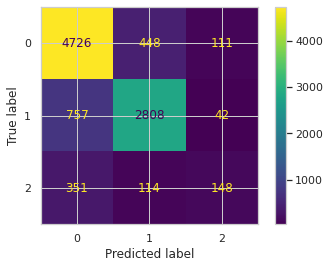

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[1], display_labels=clfs[1].classes_)
disp.plot()
plt.show()

Logistic Regression

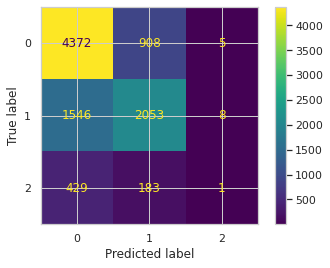

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[2], display_labels=clfs[2].classes_)
disp.plot()
plt.show()

XGBoost

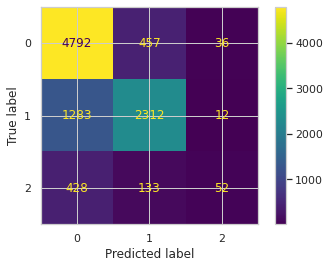

In [94]:

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices[3], display_labels=clfs[3].classes_)
disp.plot()
plt.show()

###Plotting One vs Rest ROC curves for our classifiers

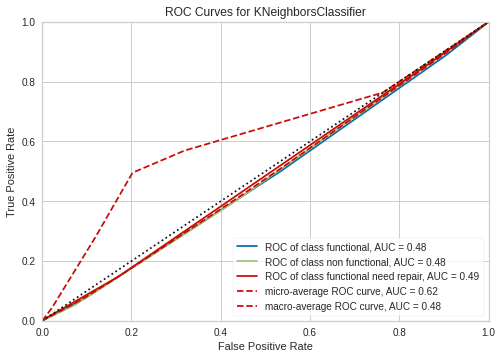

In [95]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clfs[0], classes=["functional", "non functional", "functional need repair"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

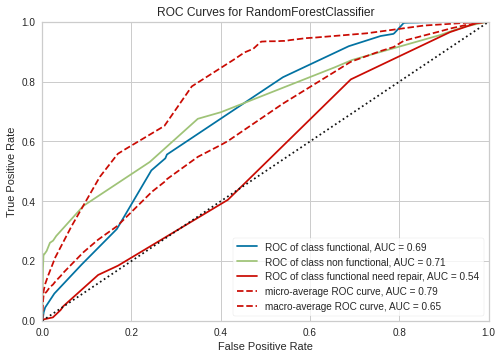

In [96]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clfs[1], classes=["functional", "non functional", "functional need repair"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

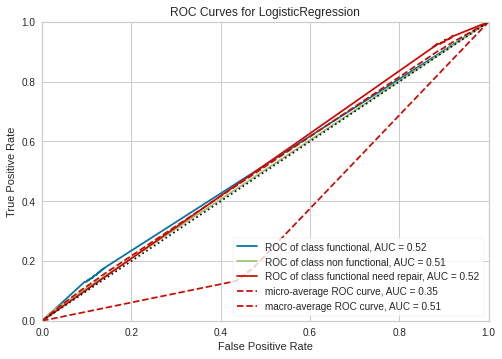

In [97]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clfs[2], classes=["functional", "non functional", "functional need repair"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

We experimented with one vs all methods and thought maybe combining labels (functional, functional needs repair) would make sense to measure TPR as a metric but it seems that this is not a good approach

In [ ]:
# the grid search took too long on xgboos so the loop was paused but the improvement in results were so minor for the other 3 classifiers that we instantiated with out initial parameters and it performed well